In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

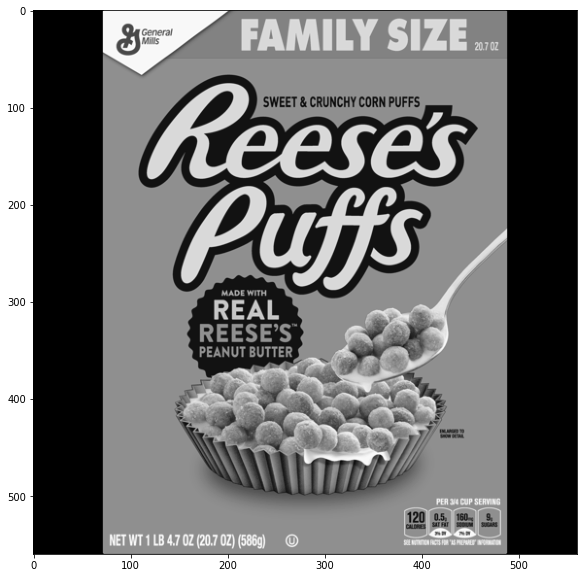

In [2]:
reeses = cv2.imread('reeses_puffs.png',0)
display(reeses)

In [3]:
cereals = cv2.imread('many_cereals.jpg',0)

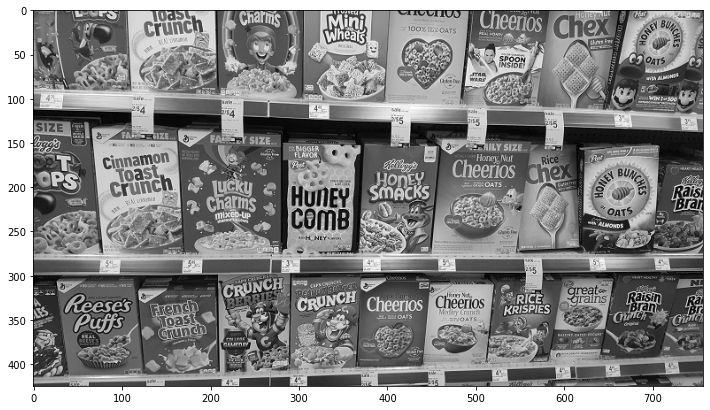

In [4]:
display(cereals)

In [5]:
orb = cv2.ORB_create()

In [6]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [7]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [8]:
matches = bf.match(des1,des2)

In [9]:
matches = sorted(matches,key=lambda x:x.distance)

In [10]:
single_match = matches[0]

In [11]:
single_match.distance

44.0

In [12]:
matches = sorted(matches,key=lambda x:x.distance)

In [13]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

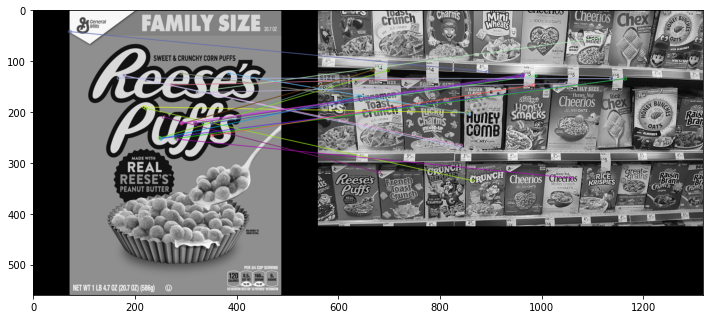

In [14]:
display(reeses_matches)

In [15]:
sift = cv2.xfeatures2d.SIFT_create()

In [16]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [17]:
bf = cv2.BFMatcher()

In [18]:
matches = bf.knnMatch(des1,des2,k=2)

In [19]:
good = []

for match1,match2 in matches:
    # IF MATCH 1 DISTANCE IS LESS THAN 75% OF MATCH 2 DISTANCE
    # THEN DESCRIPTOR WAS A GOOD MATCH.  LETS KEEP IT.
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [20]:
len(good)

78

In [21]:
len(matches)

1500

In [22]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

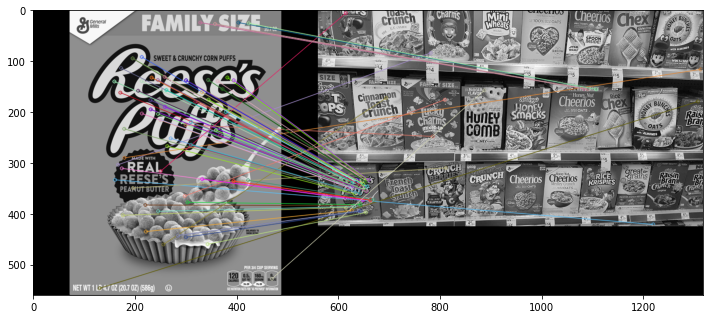

In [23]:
display(sift_matches)

In [24]:
sift = cv2.xfeatures2d.SIFT_create()

kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [31]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [35]:
matchesMask = [[0,0] for i in range(len(matches))]

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good =[]
# LESS DISTANCE -- BETTER THE MATCH
for i,(match1,match2) in enumerate(matches):
  #if MATCH1 DISTANCE is < 75% of MATCH 2 THEN IT IS A GOOD MATCH
  if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]

In [40]:
draw_params = dict(matchColor=(0,0,255),
                  singlePointColor=(255,0,0),
                  matchesMask=matchesMask,
                  flags=0)

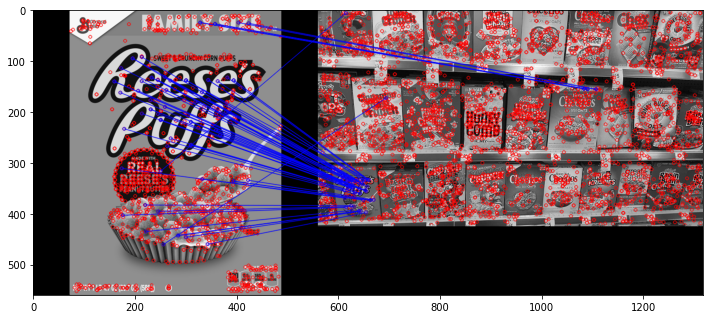

In [41]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display(flann_matches)